# Article：Congestion detection in pedestrian crowds using oscillation in motion trajectories

# 标题： 基于运动轨迹振荡的行人拥挤检测


## 核心内容

- 提出了一种新的检测和定位人群拥挤位置的方法

- 为评价方法引入了一个新的数据集

- 此方法不需要目标检测和跟踪

- 此方法是可靠的，适用于任何场景

- 以时空方式利用震荡图来检测视频中的拥塞并使其本地化


## 摘要

- 提出的方法：针对高密度人群拥挤问题，提出了一种基于个体特征运动的拥挤检测与定位方法

- 原理：由于拥挤而不能自由行走的人往往会横向振动，所以只要计算出轨迹振荡增大的区域就可以确定拥挤的位置。而人群轨迹可以通过从光流和粒子平流中提取的运动特征生成。


## 一、引言（背景知识）


### 1、人群拥挤研究进程

- 2007年，Ali和Shah，通过计算局部运动特征的光流，在较高的水平上收集全局信息，他们采用这种方法，并且利用拉格朗日粒子动力学模型将人群场景分割成不同的相干区域。

- 2009年，Mehren，通过检测逃跑恐慌情况下的异常行为，但是我们关心的是检测和定位逃跑恐慌情况下在出入口产生的拥堵。

- 2008年，Ali和Shah，使用人群的运动信息来跟踪个体，但是我们设计跟踪技术。

- Min（2008）和Widhalm和Brandle（2010）年，提出在人群场景中学习运动模式的方法，但是我们不需要学习运动模式。

- Khan（2016）年提出描述场景中主要流动的方法，并检测不同流动源的位置。我们的目标不是描述不同的流量，而是检测和定位拥塞区域的人群现场。


分界线

- 作者认为（2019年），具体的人群拥挤还没有得到深入的研究，关于拥挤行为模型的文献发表的十分有限。一个进展缓慢的可能原因是由于缺少数据集。


- **1、Krausz 和 Bauckhage（2012）提出实时监测视频拥塞的自动视觉系统，计算两个连续视频帧的密度光流，计算出运动大小和运动方向直方图，采用K平均算法聚类算法对二维直方图进行聚类，计算直方图沿主要方向的微小运动能反映人体的横向振动。同样的方法也适用于Huang（2015）提出的方法，其中熵的计算被视为人群拥挤的指标。（什么熵？不知道）**


- **2、最近的工作是Monari（2016），作者从人群场景中提取KLT轨迹，然后计算轨道密度和局部惯性来估计拥堵。**


- **以上两个基于视觉的系统是有局限性的：**

    - 对视频进行全局分析，不能定位拥塞，
    
    - 仅使用一个视频试验，限制了系统的泛化能力。


- 还有一种方法是利用人群密度估计拥塞程度，但是，单纯的人群密度估计和计数方法并不能提供足够的拥挤区域信息，在大多数情况下，即使有很高的密度，仍然被认为是正常的。


### 2、检测和定位拥挤模型框架介绍


- 1、可靠的模型应该实现以下目标：

  1）能发展有效的运动特征，公平的描述拥挤；
  
  2）能自动和检测视频现场拥堵区域；
  
  3）能抵抗噪声和透视图的扭曲，并且能够区分行人随机行为（游荡等）和拥挤；
  
  4）有适当的数据集来评价模型
  
  
- 2、作者的框架：

  1）通过计算振荡特征来检测交通拥堵；
  
  2）利用振荡映射定位拥塞区域，在用空间和时间信息进一步优化；
  
  3）引入一个数据集评价模型，这是第一个评价拥塞系统的数据集。
  
  
## 二、行人在拥挤地区的行为

- 1、什么是横向振荡？

  行人在拥挤情况下，不会沿着期望的速度和方向移动，而是从一边移动到另一边，创造一个波动的曲线，这种波动的曲线就是横向振动。横向振荡幅度和速度关系图如图一所示。
  
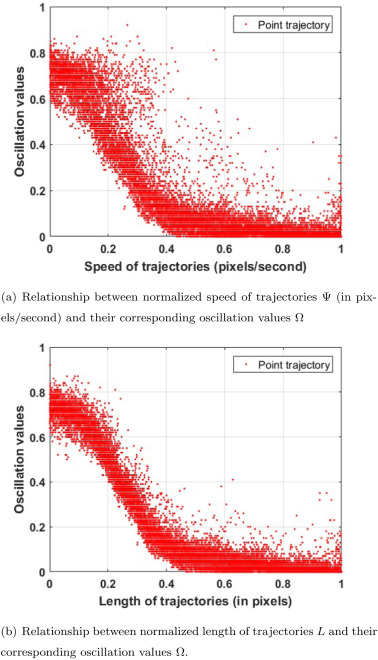
  
$$图一 拥挤区域的轨迹行为$$

- 2、在哪些场景下容易发生拥塞？

  1）行人疏散和出入口；
  
  2）交通受限，大量的行人发生冲突；
  
  3）障碍物阻挡。
  
- 3、作者的思路：

  在高密度情况下，很难跟踪每一个行人。作者通过点轨迹来捕获局部运动信息，在一帧中检测出时空局部特征，通过视频的其余帧进行跟踪。然后通过点轨迹了解行人在拥挤期间的行为。
  
  **为了了解拥挤中的人群行为，作者研究了点轨迹的振荡与其速度和长度的关系：**
  
  设点P的轨迹${T_p} = \{ ({x_1},{y_1}),({x_2},{y_2}),...,({x_k},{y_k})\} $，其中$({x_k},{y_k})$表示点P的空间坐标，K表示帧数。
  
  计算点P的平均速度：$${\psi _p} = \frac{1}{K}\sum\nolimits_{K = 1}^K {\sqrt {{{({x_k} - {x_{k + 1}})}^2} + {{({y_t} - {y_{t + 1}})}^2}} } \tag{1}$$
  
  使用什么方法可以计算轨迹的震荡值osci，然后计算所有点的轨迹速度$\psi {\text{ = \{ }}{\psi _1},{\psi _2},...,{\psi _n}\} $和震荡值$\Omega {\text{ = \{ osc}}{{\text{i}}_1},osc{i_2},...,osc{i_n}\} $，得到的速度和振荡分布图如图二所示。由图可以得到，轨迹的速度越高，震荡值越小的时候，表明人群没有发生拥挤。
  
  
## 三、框架

### 3.0、流程图
  作者提出的框架流程图如图二所示：

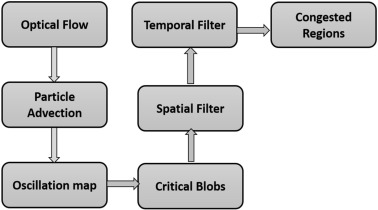

  $$图二 框架概览$$

  <font color=black sise = 7>**作者认为，拥挤中的人群，行人不会沿着一条直线以期望的速度和方向前行，而是小范围的从一个地方移动到另一个地方，产生横向振荡。通过光流和粒子平流提取出运动信息，然后提取轨迹信息。得到点轨迹之后，根据作者提出的方法计算出点的振荡值，绘制出震荡图，在量化震荡图之后识别出拥挤的候选地点，在经过对震荡图的时间和空间分析，选择置信度高的地点作为准确的拥挤位置。**</font>
  
### 3.1、捕捉运动信息

- 1、提取点轨迹的两种方法：

  1）时空局部特征
  
  在第一帧提取局部特征，然后在n帧进行跟踪。但是因为稀疏覆盖的原因，这种方法只能检测到少量的特征点。
  
  2）密度光流（Sand and Teller，2008）
  
  通过计算视频中每个像素的光流，表现场景中的运动。有很多人使用过这种方法，例如：
  
  （Brox和Malik，2010）：计算密集光流，然后分析提取到的点轨迹，进行目标分割。
  （Ali和Shah，2008）：通过覆盖场景中的二维粒子网格，来初始化一个动力系统的方法提取点轨迹。这个动力系统的时间积分提供了粒子轨迹。这种方法被用于这篇文章当中。
  
#### 3.1.1、粒子平流
- &emsp;&emsp;1、框架的输入是视频帧序列，把它划分成长度和持续时间相等的N个重叠片段。提取轨迹的第一步是计算每个分段的连续帧之间的密集光流，使用的方法是Brox（2004）提出来的，具体参考文献。
<br>

- &emsp;&emsp;2、计算出光流之后，在每个分段的初试框架上叠加粒子网格来初始化一个连续的动力系统，其中i的速度本质上是同一点的光流，并且是由方程$${V_i} = F({X_i})\tag{2}$$给出的。其中${X_i} = [x,y{[^t}$代表粒子的位置，$F({X_i}) = [u,v{[^t}$代表粒子的速度，u、v是沿着x、y方向上的速度。并且由此得到粒子下一个时刻的位置公式：$${X_{(i,t + 1)}} = F({X_{(i,t)}}) + {X_{(i,t)}}\tag{3}$$

- &emsp;&emsp;3、网格分辨率问题：图片的分辨率为${R_x} \times {R_y}$，如果网格分辨率${G_x} \times {G_y}$和图片分辨率一样将会导致高昂的计算成本，所以需要将网格分辨率降低一个尺度$\alpha $，0<$\alpha$≤1。尺度值不能太小，太小容易导致过于稀疏的轨迹，不能捕捉运动的全部信息。经过试验，作者将尺度值定为0.65。
  
### 3.2、轨迹特征

- &emsp;&emsp;得到了轨迹之后，需要计算粒子的振荡值，对于一个点轨迹${T_p} = \{ X,\theta \}$，其中X表示点的空间位置，${\text{X}} = \{ ({x_1},{y_1}),({x_2},{y_2}),...,({x_k},{y_k})\}$，$\theta$表示连续两帧上点的方向，$\theta  = \{ {\theta _1},{\theta _2},...,{\theta _{k - 1}}\}$。然后执行下面步骤：

&emsp;&emsp;1、计算给定轨迹${T_p}$的循环平均值${\theta _\mu }$，具体参考Berens等人在2009年提出的方法。

&emsp;&emsp;2、计算循环距离，公式为：$$CircDis{t_i} = ({\theta _\mu } - {\theta _i})\tag{4}$$

&emsp;&emsp;3、计算振荡指示器：
$$
  Os{c_i} = \left\{
 \begin{matrix}
   1 & {({\theta _\mu } - {\theta _i)} < \psi ,\psi  = \frac{\pi }{4}}  \\ 
   0 & {otherwise}  \\ 
  \end{matrix}
  \right.\
\tag{5}$$

&emsp;&emsp;4、计算总轨迹振荡指示器：
$$Os{c_T} = \frac{{\sum\limits_{i = 0}^{K - 1} {Os{c_i}} }}{k}\tag{6}$$

<font color=red sise = 7>**接下来就是振荡映射，但是，有一个严重的问题，什么是振荡映射？没看懂,后面说是从0到1的不同振荡值的谱。** 
**呸，神经病，Oscillation map是震荡图而不是振荡映射**
</font>

<font color=yellow sise = 7>**还有一个问题，振荡值是整个点轨迹的振荡值还是点轨迹当中每个点的振荡值，按照文章的意思，是属于前者的，因为最终求得的是整个轨迹的振荡平均值$Os{c_T}$。应该是的，因为如果求一条轨迹中每个点的振荡值是没有意义的，它并不能代表全局运动特征，只是某一个瞬间的振荡情况。**
</font>

### 3.3、感兴趣区域